✅ Crew Scheduling Solution:
{'C1': ['F1', 'F3'], 'C2': ['F2', 'F5'], 'C3': ['F4']}
⏱️ Execution Time: 0.0 seconds


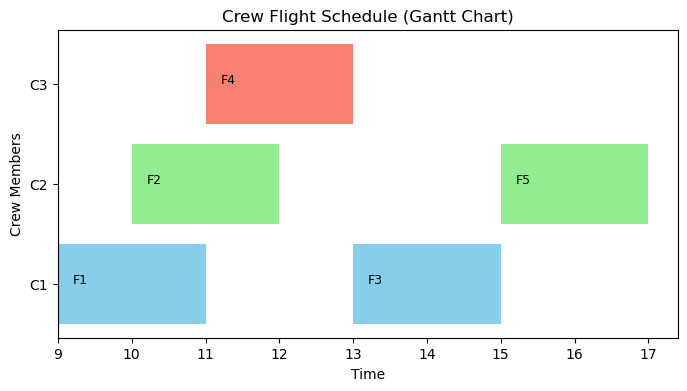

In [1]:
# Airline Crew Scheduling using Backtracking and Constraint Satisfaction

import matplotlib.pyplot as plt
import time

# Input 
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13),
    ('F5', 15, 17)
]

crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1  # rest time between flights

# Constraint Check 
def is_valid(assigned, new_flight):
    for (_, s, e) in assigned:
        if not (new_flight[2] + MIN_REST <= s or new_flight[1] >= e + MIN_REST):
            return False
    return True

# Backtracking
def assign_flights(i, assign):
    if i == len(flights):
        return True
    f = flights[i]
    for c in crew_members:
        if is_valid(assign[c], f):
            assign[c].append(f)
            if assign_flights(i + 1, assign):
                return True
            assign[c].remove(f)
    return False

# Solve 
def solve_schedule():
    assign = {c: [] for c in crew_members}
    if assign_flights(0, assign):
        return {c: [f[0] for f in v] for c, v in assign.items()}
    else:
        return None

# Visualization 
def plot_schedule(result):
    if not result:
        print("No valid schedule found.")
        return
    colors = ['skyblue', 'lightgreen', 'salmon']
    plt.figure(figsize=(8,4))
    for i, c in enumerate(result):
        for f in result[c]:
            for fl in flights:
                if fl[0] == f:
                    plt.barh(c, fl[2]-fl[1], left=fl[1], color=colors[i%3])
                    plt.text(fl[1]+0.2, i, f, fontsize=9, color='black')
    plt.xlabel("Time")
    plt.ylabel("Crew Members")
    plt.title("Crew Flight Schedule (Gantt Chart)")
    plt.show()

# Run & Profile
start = time.time()
result = solve_schedule()
end = time.time()

print("✅ Crew Scheduling Solution:")
print(result)
print(f"⏱️ Execution Time: {round(end - start, 4)} seconds")

plot_schedule(result)
